## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata)
study_results_df = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_data_df = pd.merge(study_results_df,mouse_metadata_df)

## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Bar plots

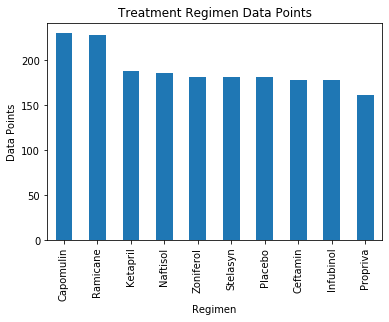

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

regimen_counts = combined_data_df["Drug Regimen"].value_counts()
regimen_counts.plot(kind="bar")
plt.title("Treatment Regimen Data Points")
plt.xlabel("Regimen")
plt.ylabel("Data Points")
plt.show()

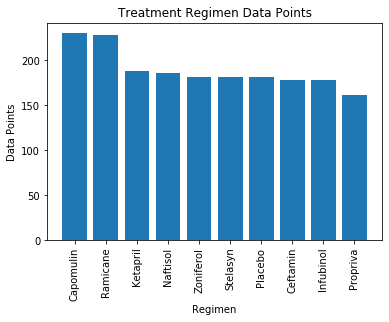

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

regimen_x = regimen_counts.index.values
regimen_y = regimen_counts.values
plt.bar(regimen_x,regimen_y)
plt.xticks(rotation="vertical")
plt.title("Treatment Regimen Data Points")
plt.xlabel("Regimen")
plt.ylabel("Data Points")
plt.show()

## Pie plots

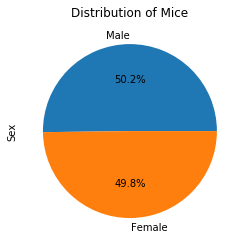

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_counts = mouse_metadata_df["Sex"].value_counts()
sex_counts.plot(kind="pie",autopct="%1.1f%%",title="Distribution of Mice")
plt.show()

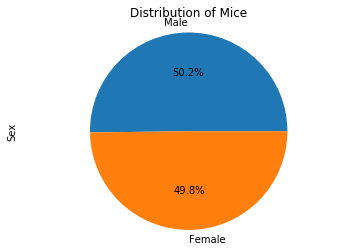

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pie_labels = sex_counts.index.values
plt.pie(sex_counts, labels=pie_labels, autopct="%1.1f%%")
plt.title("Distribution of Mice")
plt.axis("equal")
plt.ylabel("Sex")
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

In [8]:
# Determine max values for each mouse and reset index

max_timepoint = combined_data_df.groupby(["Mouse ID"]).max()
max_timepoint = max_timepoint.reset_index()

In [9]:
# Create dataframe to store each mouse's max timepoint with its final tumor volume

final_tumor_volume_df = max_timepoint[['Mouse ID','Timepoint']].merge(combined_data_df,on=['Mouse ID','Timepoint'],how="left")
#merged_data_df.head()

In [10]:
# Store final tumor volume for each of the top four regimens in separate series

capomulin = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"]
ramicane = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
infubinol = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"] == "Infubinol"]["Tumor Volume (mm3)"]
ceftamin = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"] == "Ceftamin"]["Tumor Volume (mm3)"]

In [11]:
# Calculate quartile values and IQLs to determine outlier tumor volumes from Capomulin treatment 

quartiles_capomulin = capomulin.quantile([.25,.5,.75])
lowerq_capomulin = quartiles_capomulin[0.25]
upperq_capomulin = quartiles_capomulin[0.75]
iqr_capomulin = upperq_capomulin-lowerq_capomulin

lower_bound_capomulin = lowerq_capomulin - (1.5*iqr_capomulin)
upper_bound_capomulin = upperq_capomulin + (1.5*iqr_capomulin)
capomulin_outliers = capomulin[(capomulin < lower_bound_capomulin) | (capomulin > upper_bound_capomulin)]

if len(capomulin_outliers) > 0:
    print(f"Among final tumor volumes from Capomulin treatment, the potential outliers were:\n{capomulin_outliers}")
else:
    print("There were no potential outliers from Capomulin treatment.")

There were no potential outliers from Capomulin treatment.


In [12]:
# Calculate quartile values and IQLs to determine outlier tumor volumes from Ramicane treatment 

quartiles_ramicane = ramicane.quantile([.25,.5,.75])
lowerq_ramicane = quartiles_ramicane[0.25]
upperq_ramicane = quartiles_ramicane[0.75]
iqr_ramicane = upperq_ramicane-lowerq_ramicane

lower_bound_ramicane = lowerq_ramicane - (1.5*iqr_ramicane)
upper_bound_ramicane = upperq_ramicane + (1.5*iqr_ramicane)
ramicane_outliers = ramicane[(ramicane < lower_bound_ramicane) | (ramicane > upper_bound_ramicane)]

if len(ramicane_outliers) > 0:
    print(f"Among final tumor volumes from Ramicane treatment, the potential outliers were:\n{ramicane_outliers}")
else:
    print("There were no potential outliers from Ramicane treatment.")

There were no potential outliers from Ramicane treatment.


In [13]:
# Calculate quartile values and IQLs to determine outlier tumor volumes from Infubinol treatment 

quartiles_infubinol = infubinol.quantile([.25,.5,.75])
lowerq_infubinol = quartiles_infubinol[0.25]
upperq_infubinol = quartiles_infubinol[0.75]
iqr_infubinol = upperq_infubinol-lowerq_infubinol

lower_bound_infubinol = lowerq_infubinol - (1.5*iqr_infubinol)
upper_bound_infubinol = upperq_infubinol + (1.5*iqr_infubinol)
infubinol_outliers = infubinol[(infubinol < lower_bound_infubinol) | (infubinol > upper_bound_infubinol)]

if len(infubinol_outliers) > 0:
    print(f"Among final tumor volumes from Infubinol treatment, the potential outliers were:\n{infubinol_outliers}")
else:
    print("There were no potential outliers from Infubinol treatment.")

Among final tumor volumes from Infubinol treatment, the potential outliers were:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [14]:
# Calculate quartile values and IQLs to determine outlier tumor volumes from Infubinol treatment 

quartiles_ceftamin = ceftamin.quantile([.25,.5,.75])
lowerq_ceftamin = quartiles_ceftamin[0.25]
upperq_ceftamin = quartiles_ceftamin[0.75]
iqr_ceftamin = upperq_ceftamin-lowerq_ceftamin

lower_bound_ceftamin = lowerq_ceftamin - (1.5*iqr_ceftamin)
upper_bound_ceftamin = upperq_ceftamin + (1.5*iqr_ceftamin)
ceftamin_outliers = ceftamin[(ceftamin < lower_bound_ceftamin) | (ceftamin > upper_bound_ceftamin)]

if len(ceftamin_outliers) > 0:
    print(f"Among final tumor volumes from Ceftamin treatment, the potential outliers were:\n{ceftamin_outliers}")
else:
    print("There were no potential outliers from Ceftamin treatment.")

There were no potential outliers from Ceftamin treatment.


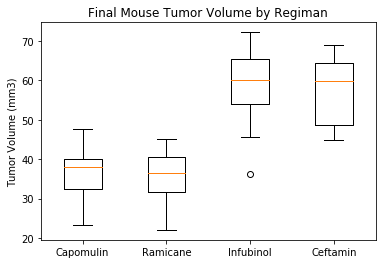

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1,ax1 = plt.subplots()
ax1.set_title('Final Mouse Tumor Volume by Regiman')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.show()

## Line and scatter plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

([<matplotlib.axis.XTick at 0x1a20ac4150>,
 <a list of 10 Text xticklabel objects>)

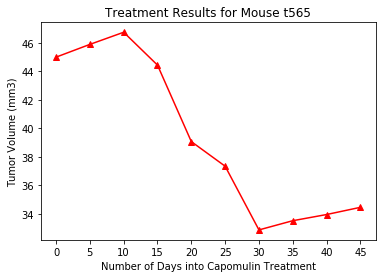

In [17]:
# Select a random mouse that received Capomulin and compile its study result data into a DataFrame
random_mouse = mouse_metadata_df[mouse_metadata_df["Drug Regimen"] == "Capomulin"].sample(1)
random_mouse_id = random_mouse.iloc[0,0]
random_mouse_df = study_results_df[study_results_df["Mouse ID"] == random_mouse_id]
#print(random_mouse_df)

#Create and style the line plot
plt.plot(random_mouse_df["Timepoint"],random_mouse_df["Tumor Volume (mm3)"],marker="^",color="red")
plt.title("Treatment Results for Mouse " + random_mouse_id)
plt.xlabel("Number of Days into Capomulin Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(random_mouse_df["Timepoint"],)

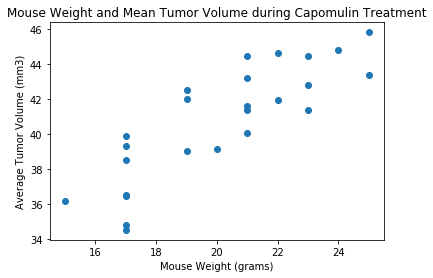

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Create a dataframe that contains just data for mice that received Capomulin
capomulin_df = combined_data_df.loc[combined_data_df["Drug Regimen"] == "Capomulin"]

# Determine mean values for each mouse
mean_capomulin_df = capomulin_df.groupby(["Mouse ID"]).mean()

# Excerpt the weight and volumns and assign them to Series
capomulin_weights = mean_capomulin_df["Weight (g)"]
mean_capomulin_volumes = mean_capomulin_df["Tumor Volume (mm3)"]

# Plot the data
plt.scatter(capomulin_weights,mean_capomulin_volumes)
plt.title("Mouse Weight and Mean Tumor Volume during Capomulin Treatment")
plt.xlabel('Mouse Weight (grams)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [19]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen